In [2]:
import numpy as np
from numpy import savetxt
from numpy import loadtxt
from numpy import asarray
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math


In [3]:
#import os
#os.listdir()

This file contains waveforms from board:  01
  -- Here is a list of 1725 running:  
  -- Here is a list of 1742 running:  01
File Start Date:  2023-01-18
File Start Time:  16:40:10.328110
List of groups:  ['Events', 'Metainfo']
<HDF5 dataset "Timestamp": shape (36,), type "<u8">
Average ADC count from channel 0:  2041.02734375


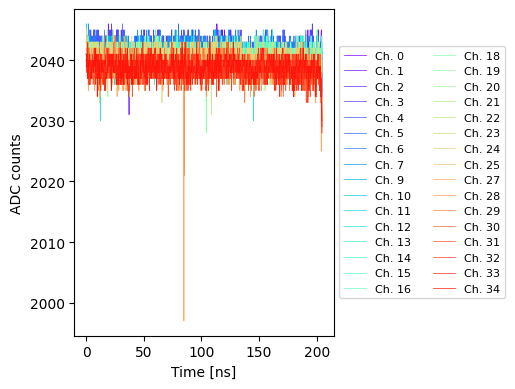

In [4]:
import time
from optparse import OptionParser
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib import cm


event_number = str(1)

infile = h5py.File('Data/01_subRun000001.hdf5', 'r')
Metainfo = infile['Metainfo']
FileGlobalTimestamp = Metainfo.attrs['StartTime']
DigitizerBoard = Metainfo.attrs['DigitizerBoard']
print('This file contains waveforms from board: ', DigitizerBoard)
print('  -- Here is a list of 1725 running: ', Metainfo.attrs['Digitizer1725_running'] )
print('  -- Here is a list of 1742 running: ', Metainfo.attrs['Digitizer1742_running'] )
print('File Start Date: ', FileGlobalTimestamp.split(' ')[0])
print('File Start Time: ', FileGlobalTimestamp.split(' ')[1])

print('List of groups: ', list(infile.keys()))


events = infile['Events']
event = events.get(event_number)

event_waveforms = event['Waveforms']
event_timestamp = event['Timestamp']

samples_per_wv = len(event_waveforms[0])
print(event_timestamp)
if len(list(set(event_timestamp)))>1:
    print('Problem, more than one timstamp')
    print(event_timestamp)

print('Average ADC count from channel 0: ', np.average(event_waveforms[0]))
colors = cm.rainbow(np.linspace(0, 1, len(event_waveforms)))

fig, ax1 = plt.subplots(figsize = [7,4])
sample_time = 0.2
trChs = [8, 17, 26, 35]
x1 = [i*sample_time for i in range(samples_per_wv)]
for i in range(len(event_waveforms)):
    #plt.title('Event:'+event_number+ ' Board:'+DigitizerBoard)
    if i in trChs:
        continue
        plt.plot(x1,event_waveforms[i],color = colors[i],label = 'Trg. Ch. '+str(i),linewidth = 2)
    else:
        plt.plot(x1,event_waveforms[i],color = colors[i],label = 'Ch. '+str(i),linewidth = 0.5)
plt.xlabel('Time [ns]')
plt.ylabel('ADC counts')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 8,ncol=2)
plt.tight_layout(rect=[0,0,0.75,1])
plt.show()

# I should have another entry for events list. Metadata, event list, 
# Plot time stamps. which channel?

ch = 30
y2 = []
x2 = []
for i in list(events):
    #print(i)
    event = events.get(i) 
    event_waveforms = event['Waveforms']
    event_timestamp = event['Timestamp']
    #event_timestamp = event_waveforms.attrs['Timestamp']
    x2.append(int(i)) 
    y2.append(event_timestamp[ch]/1E6)

In [5]:
def get_noise_flatdot(num_samples,stepsize):
    random_channel = np.random.randint(len(event_waveforms_flatdot[0]))
    data=event_waveforms_flatdot[0][random_channel]
    #print(random_channel)
    startindex = np.random.randint(np.abs(len(data)-num_samples))
    datanewADC=data[startindex:startindex+num_samples]
    datanewvoltage=datanewADC*stepsize
    return datanewvoltage

In [6]:
 def get_noise(num_samples,stepsize):
                random_channel = np.random.randint(35)
                data=event_waveforms[random_channel]
    #print(random_channel)
                startindex = np.random.randint(np.abs(len(data)-num_samples))
                datanewADC=data[startindex:startindex+num_samples]
                datanewvoltage=datanewADC*stepsize
                return datanewvoltage

In [7]:
arr=np.genfromtxt('dataset.csv', delimiter=',')
display(arr)

FileNotFoundError: dataset.csv not found.

In [8]:
def SER(t,V,x,offset): #V = peak height, x = horizontal shift, offset = Vertical shift
    tau = 4
    sigma = 0.5
    return np.piecewise(t, [t < x, t >=x], [offset, lambda z : (V * np.exp(-1/2* (np.log((z-x)/tau)/sigma)**2))+offset])

1000


/var/folders/m0/kccxd_7n6flg0bwpgpwl42p40000gq/T/ipykernel_62005/688183739.py:4: RuntimeWarning: divide by zero encountered in log
  return np.piecewise(t, [t < x, t >=x], [offset, lambda z : (V * np.exp(-1/2* (np.log((z-x)/tau)/sigma)**2))+offset])


[[0.244], [0.244], [0.244], [0.12199999999999998], [0.0], [0.0], [0.0], [-0.122], [-0.244], [-0.122], [0.0], [0.0], [0.0], [0.0], [0.0], [-0.12199999999999986], [-0.244], [-0.12199999999999986], [0.0], [0.12200000000000014], [0.244], [0.244], [0.244], [5.273559366969494e-16], [-0.244], [-0.122], [0.0], [0.0], [0.0], [-0.122], [-0.244], [-0.12199999999999972], [0.0], [-0.12199999999999973], [-0.244], [-0.122], [0.0], [-0.12199999999999973], [-0.244], [-0.122], [0.0], [-0.12199999999999973], [-0.244], [-0.12199999999999946], [0.0], [0.0], [0.0], [0.12199999999999998], [0.244], [0.12200000000000055], [0.0], [-0.12200000000000054], [-0.244], [-0.12200000000000001], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.12199999999999998], [0.244], [0.12200000000000055], [0.0], [0.0], [0.0], [0.12200000000000054], [0.244], [0.12200000000000001], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [-0.12199999999999998], [-0.244], [-2.7755575615628914e-17]

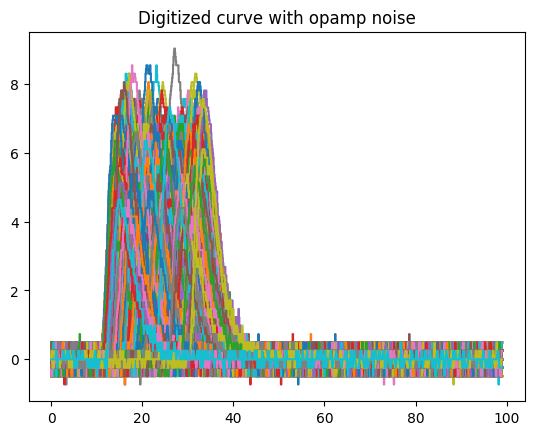

In [11]:
time_window_size_ns = 100    #how long do you want your window to be
divs_per_ns = 10             # how many samples per nanosecond do you want?
t = np.linspace(0, time_window_size_ns-1, time_window_size_ns * divs_per_ns) #t values(time range defined) 
print(len(t))
np.random.seed(123)
step = 0.244
rms_noise = .11
samples_per_ns = 5

amplification = 1

n_waveforms = 3000

SER_waveforms = []
SER_timebins  = []
waveforms_wnoise = []
voltage=[]

def round_nearest(x):
    return round(x / step) * step

for i in range(n_waveforms):
    # Make some amplitude for the pulse
    amplitude = -100
    while amplitude < 0.25 or amplitude > 10:
        amplitude = np.random.normal(5,1) # take from real data
    
    # Make some time for the pulse
    pulse_time = -100
    while pulse_time < 10 or pulse_time > 30:
        pulse_time = np.random.randint(10*divs_per_ns,30*divs_per_ns)/divs_per_ns
    pulse_bin = int(pulse_time * divs_per_ns)
    #print(pulse_bin)
    
    
    SER_waveform = SER(t,amplitude,pulse_time,0)
    SER_waveforms.append(SER_waveform)

    SER_timebin = []
    Voltage=[]
    for j in range(len(t)):
        if j >= pulse_bin:
            SER_timebin.append([1.,0.])
            Voltage.append([SER_waveform[j]])
        else:
            SER_timebin.append([0.,1.])
            Voltage.append([0.])
    SER_timebins.append(SER_timebin)
    voltage.append([Voltage])
    #print(voltage[0])
    
    
    op_amp_noise = np.random.normal(0,0.09454,len(t)) #opamp different noise for every waveform
    
    digitizer_noise = np.random.normal(0,rms_noise,len(t)) # Need to take from real data.
   # digitizer_noise = get_noise(len(t),step)
    waveform_wnoise = SER_waveform+op_amp_noise+digitizer_noise
    dig_waveform_wnoise = []
    dig_time = []
    for i in np.arange(0,time_window_size_ns*divs_per_ns,divs_per_ns/samples_per_ns):
        dig_waveform_wnoise.append(round_nearest(waveform_wnoise[int(i)]))
        dig_time.append(t[int(i)])
        
    #dig_waveforms_wnoise.append(dig_waveform_wnoise) # This is fake data.
    
    # Interpolate to precision level
    interp_waveform_wnoise = np.interp(t,dig_time,dig_waveform_wnoise)
    interp_waveform_wnoise = [[j] for j in interp_waveform_wnoise]
    
    waveforms_wnoise.append(interp_waveform_wnoise)

    
print(waveforms_wnoise[0])
print(voltage[0])
np.save('Data/labels.npy',SER_timebins)
np.save('Data/data.npy',waveforms_wnoise)
np.save('Data/Voltages', voltage)

for i in range(len(waveforms_wnoise)):
    
    plt.step(t,waveforms_wnoise[i])
    plt.title("Digitized curve with opamp noise")
plt.show()



(27, 250, 1)


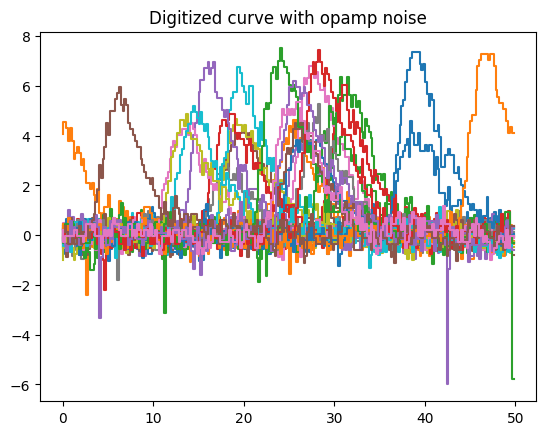

In [131]:
n_samples = 1000                          #how many points u want
divs = 20                                 # how close together the points should be. "gives sampling rate"
t = np.linspace(0,n_samples-1,n_samples)/divs #t values(time range defined) 
np.random.seed(123)
                                          #V0=np.random.uniform(low=1, high=10, size=1000)
V0 = np.random.normal(5,1,20)

                                          #single example with graphs of the curves

step = 0.244                              #digitizer step size in voltage
amplification = 1                         #amplify signal
shift = np.absolute(np.random.normal(1,0.2)*15)



#xp,yp=np.loadtxt("dataset.csv",unpack=True,delimiter=",",skiprows=1)


                                           #make arrays for the data to shift in ML code
waveforms = []
true_times = []
true_amp = []
#yndig = []
true_signal = []

waveform_dig = []
                                           #for i in range(len(t)):
for j in range(len(V0)):
                                           #AMP = np.random.choice(xnew, p=ynew)
                                           #V0[j]

    if V0[j]>0.25 and V0[j]<10:
        t_shift = -100
        while t_shift < 10 or t_shift > +30:
            t_shift = np.random.normal(20,10)
            true_times_list=[]
            #print(t_shift)
            
            y = SER(t,V0[j],t_shift,0)
           
            noise1 = np.random.normal(0,0.09454,n_samples) #opamp different noise for every waveform
            yn1 = (y+noise1)*amplification
            
                                            #plt.show()
            
            waveforms.append(yn1)
            
            
            true_amp.append(V0[j])
            for i in range(250):
                if i>=t_shift:
                    true_times_list.append([1,0])
                else:
                    true_times_list.append([0,1])
            true_times.append(true_times_list)
            #plt.plot(t,yn1)
            #plt.show()
            #plt.title("SER Curve with Opamp noise")
            ydig = [] 
            tdig = []
            #array to input digitizer values into
            
            dig_sample_rate = int(divs/5)
            num_dig_samples = int(np.floor(len(t)/dig_sample_rate)) 
                                            # calculate how many samples the digitizer will actually take from the list
                                            # of t-values. Since the digitizer samples every 1/5 ns, we sample the number of t values divided by how many t-values it takes to make up 1/5 ns. 
            
            for i in range(num_dig_samples):
                value = yn1[i*dig_sample_rate]
                t_val = t[i*dig_sample_rate]
                num_steps = int(np.round(value/step))
                val_digitized = num_steps*step
                ydig.append(val_digitized)
                tdig.append([t_val])
            noise = get_noise(len(tdig),step) 
               #add digitized noise from hdf5 file(play with the noise to make it better or worse)
            average = np.average(noise)
                                             #print(np.std(noise))
                                             #noiseflatdot = get_noise_flatdot(len(tdig),step) #add digitized noise from flatdot file
            yndig = ydig+noise-average
            yndig_wbrackets = []
            for i in range(len(yndig)):
                yndig_wbrackets.append([yndig[i]])
            waveform_dig.append(yndig_wbrackets)
            
            #plt.step(tdig,yndig)         
            
            
            #(digitized noise) plus the waveform (plt.step is going to make steps of the waveform)
                                             #yndig = ydig+noiseflatdot
                                             #avg= noise-average(just to check that the baseline is zero)
                                             #plt.plot(tdig,avg)
plt.show()                                   #make sure to check which plot you want to show
#print(tdig)




true_signal = np.asarray(true_signal)
waveforms = np.asarray(waveforms)
true_times = np.asarray(true_times)
true_amp = np.asarray(true_amp)
waveform_dig = np.asarray(waveform_dig)
#waveforms_dig = waveform_dig.reshape((753, 250, 1))
tdig = np.asarray(tdig)
np.save('true_times.npy',true_times)
np.save('waveforms.npy',waveform_dig)
print(np.shape(waveform_dig))
np.save('true_amp.npy',true_amp)
#np.savetxt('train_waves.csv', waveformtrain, delimiter=',')
#np.savetxt('train_times.csv', train_times, delimiter=',')
waveform_length = len(waveform_dig)
#print(waveform_length) 
time_length = len(true_times)
#print(time_length) #prints the t0 for each wave
#print(waveforms)
#print("waveform_dig")
#print(np.shape(waveform_dig))


for i in range(len(waveform_dig)):
    
    plt.step(tdig,waveform_dig[i])
    plt.title("Digitized curve with opamp noise")
plt.show()





#splitIndex = math.floor(time_length * 0.7);

#train_time = true_times[0:splitIndex];
#test_time = true_times[splitIndex:];

#np.savetxt('traintime.csv',train_time, delimiter=',')
#np.savetxt('testtime.csv',test_time, delimiter=',')

length = len(waveform_dig);
#print("length =", length)
#splitIndex = math.floor(length * 0.7);


#train_set = waveform_dig[0:splitIndex];
#test_set = waveform_dig[splitIndex:];

#train_len = len(train_set)
#test_len = len(test_set)

#print(train_len)
#print(test_len)

#train_set = np.asarray(train_set)
#test_set = np.asarray(test_set)

#np.savetxt('trainset.csv',train_set, delimiter=',')
#np.savetxt('testset.csv',test_set, delimiter=',')




#plotting trigger as well probably

#print(waveform_dig)
#print("time bins")
#print(np.shape(true_times))
#print(len(true_times), true_times)

In [127]:
print(np.shape(waveform_dig))

(27, 250, 1)


In [114]:
times = np.load('true_times.npy')
print(times)

[[[0 1]
  [0 1]
  [0 1]
  ...
  [1 0]
  [1 0]
  [1 0]]

 [[0 1]
  [0 1]
  [0 1]
  ...
  [1 0]
  [1 0]
  [1 0]]

 [[0 1]
  [0 1]
  [0 1]
  ...
  [1 0]
  [1 0]
  [1 0]]

 ...

 [[0 1]
  [0 1]
  [0 1]
  ...
  [1 0]
  [1 0]
  [1 0]]

 [[0 1]
  [0 1]
  [0 1]
  ...
  [1 0]
  [1 0]
  [1 0]]

 [[0 1]
  [0 1]
  [0 1]
  ...
  [1 0]
  [1 0]
  [1 0]]]


In [115]:
print(np.shape(noise1))

(1000,)


In [116]:
#noise = get_noise(len(tdig),step)
#print(noise)

In [20]:
t_shift = -100
while t_shift < -10 or t_shift > +20:
    t_shift = np.random.normal(0,10)
    print(t_shift)

8.019835025531496


In [21]:
tlength = len(tdig)
print(tlength)

250


ValueError: x must have 2 or fewer dimensions

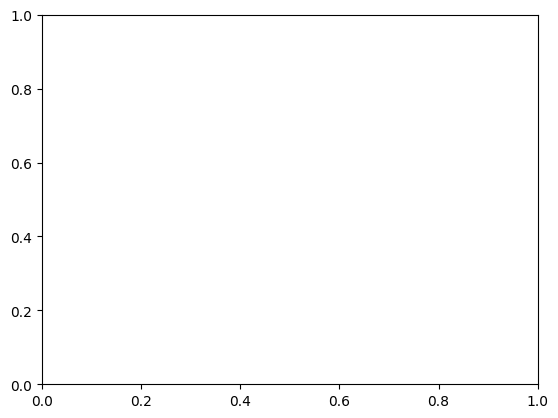

In [22]:
plt.hist(true_times)

/var/folders/m0/kccxd_7n6flg0bwpgpwl42p40000gq/T/ipykernel_4926/688183739.py:4: RuntimeWarning: divide by zero encountered in log
  return np.piecewise(t, [t < x, t >=x], [offset, lambda z : (V * np.exp(-1/2* (np.log((z-x)/tau)/sigma)**2))+offset])


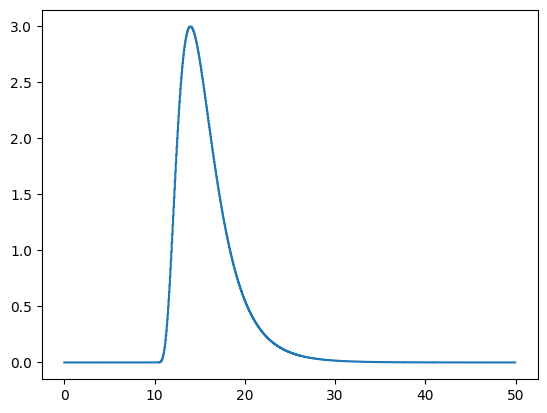

In [58]:
curve1=SER(t,3,10,0)
#curve2=SER(t,5,24,0)
#curvefinal = curve1+curve2
plt.step(t,curve1)
#plt.plot(t,curve2)
#plt.plot(t,curvefinal)

#for t in curve1:
    #curve1=SER(t,3,20,0)
    #plt.plot(t,curve1)


#What should be changed while running the loop

In [75]:
curve1


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [40]:
curve1.shape

(1000,)

In [41]:
Data=np.asarray(curve1)

In [42]:
np.savetxt('Data.csv', Data, delimiter=',')

In [43]:
print(Data)


[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000